# Dash tutorial
### Dash is a user interface library for creating analytical web applications. Those who use Python for data analysis, data exploration, visualization, modelling, instrument control, and reporting will find immediate use for Dash.


<div class="alert alert-block alert-info">
<b>Full documentation:</b>
https://plot.ly/dash/ <br><br>
<b>Related technologies:</b><br>
Pandas: https://pandas.pydata.org/<br>
Plotly: https://plot.ly/<br>
React.js: https://reactjs.org/<br>  
Flask: http://flask.pocoo.org/<br>
</div>

### 1. Installation
In order to run Dash app in a Flask server install the following libraries <br>
<div class="alert alert-block alert-warning">
Make sure you have installed <b>Python</b> (https://www.python.org/downloads/) and <b>pip</b> (https://pip.pypa.io/en/stable/installing/) 
</div>

In [ ]:
pip install dash==0.19.0  # The core dash backend
pip install dash-renderer==0.11.1  # The dash front-end
pip install dash-html-components==0.8.0  # HTML components
pip install dash-core-components==0.15.2  # Supercharged components
pip install plotly --upgrade  # Latest Plotly graphing library

### 2. About this example
In this example we are going to build a graph that shows life expectancy in comparison to GDP per capita based in all countries around the World.

### 3. First step
Besides Dash, we are using __Pandas__ for extract and manipulate data and __Plotly__ to render the output into a Graph. In order to use those libraries all you have to do is use __import__ at the beginning of your code.

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html

import plotly.graph_objs as go

import pandas as pd

import IPython

### 4. Download and read a CSV file
Use Panda's __read_csv__ function in order to download and extract your Dataset. 
When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [2]:
df = pd.read_csv('https://ndownloader.figsh.com/files/8261349')

### 5. Preview Dataset
Function __head()__ gives you a preview of the download Dataset

In [3]:
df.head()

,Unnamed: 0,country,continent,population,life expectancy,gdp per capita
0,11,Afghanistan,Asia,31889923.0,43.828,974.580338
1,23,Albania,Europe,3600523.0,76.423,5937.029526
2,35,Algeria,Africa,33333216.0,72.301,6223.367465
3,47,Angola,Africa,12420476.0,42.731,4797.231267
4,59,Argentina,Americas,40301927.0,75.320,12779.379640


### 6. Layout
Dash apps are composed of two parts: __Layout__ and __Interactivity__.  
The first part is the "layout" of the app and it describes what the application looks like.  

In this example we are going to create two kinds of filter:
- Countries: Multiple selection combo box with a list of all countries included on the Dataset
- Life Expectancy: Slider with a range of ages (min and max)
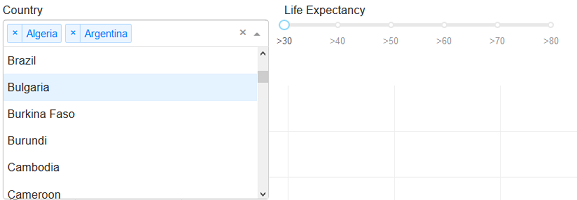


In [ ]:
countries = df['country'].unique()

app = dash.Dash()

app.layout = html.Div([
    
    html.Div([
        html.Label('Country'),
        dcc.Dropdown(
            id='country',
            options=[{'label': i, 'value': i} for i in countries],
            value='',
            placeholder='Select...',
            multi=True
        )
    ],    
    style={'width': '20%', 'display': 'inline-block', 'margin-bottom': '20px'}),    

    html.Div([
        html.Label('Life Expectancy'),
        dcc.Slider(
            id='expectancy-slider',
            min=30,
            max=80,
            value=30,
            step=None,
            marks={'30':'>30', '40':'>40', '50':'>50', '60':'>60', '70':'>70', '80':'>80'}
        ),
    ],
    style={'width': '20%', 'display': 'inline-block', 'margin-bottom': '20px', 'margin-left': '20px'}),

    html.Div([
        dcc.Graph(id='life-exp-vs-gdp'),
    ],
    style={'width': '70%'}),
])

### 7. Interactivity
Dash provides a simple reactive decorator for binding your custom data analysis code to your Dash user interface.  
When an input element changes (e.g. when you select an item in the dropdown or drag the slider), Dash’s decorator provides your Python code with the new value of the input.  
In this example we are calling __upate_graph__ function each time either a Country is selected or a life expectancy is set.

In [ ]:
@app.callback(
    dash.dependencies.Output('life-exp-vs-gdp', 'figure'),
    [
        dash.dependencies.Input('expectancy-slider', 'value'),
        dash.dependencies.Input('country', 'value')
    ])
def update_graph(expectancy, country):
    
    filtered_df = df.loc[df["life expectancy"] > expectancy]

    if (country != '' and country is not None):
        filtered_df = filtered_df[df.country.str.contains('|'.join(country))]

    traces = []
    for i in filtered_df.continent.unique():
        df_by_continent = filtered_df[filtered_df['continent'] == i]
        traces.append(go.Scatter(
            x=df_by_continent['gdp per capita'],
            y=df_by_continent['life expectancy'],
            text=df_by_continent['country'],
            mode='markers',
            opacity=0.7,
            marker={
                'size': 15,
                'line': {'width': 0.5, 'color': 'white'}
            },
            name=i
        ))

    return {
        'data': traces,
        'layout': go.Layout(
            xaxis={'title': 'GDP Per Capita', 'titlefont': dict(size=18, color='darkgrey'), 'zeroline': False, 'ticks': 'outside' },
            yaxis={'title': 'Life Expectancy', 'titlefont': dict(size=18, color='darkgrey'), 'range': [30, 90], 'ticks': 'outside'},
            margin={'l': 60, 'b': 60, 't': 30, 'r': 20},
            legend={'x': 1, 'y': 1},
            hovermode='closest'
        )
    }

### 8. Style
Every aesthetic element of the app is customisable: The sizing, the positioning, the colors, the fonts.<br>Dash apps are built and published in the Web, so the full power of CSS is available. <br>
Use __app.css.append_css__ in order to set an external CSS file

In [ ]:
app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

### 9. Running Application 
Dash apps are web applications. Dash uses Flask as the web framework. The underlying Flask app is available at app.server, and for the purpose of running the application you should call __run_server__ function in your python code as you can see below.<br>

   
Once your app is running it is accessible in a local server; the default address is http://127.0.0.1:8050/

In [4]:
if __name__ == '__main__':
    app.run_server(debug=True)

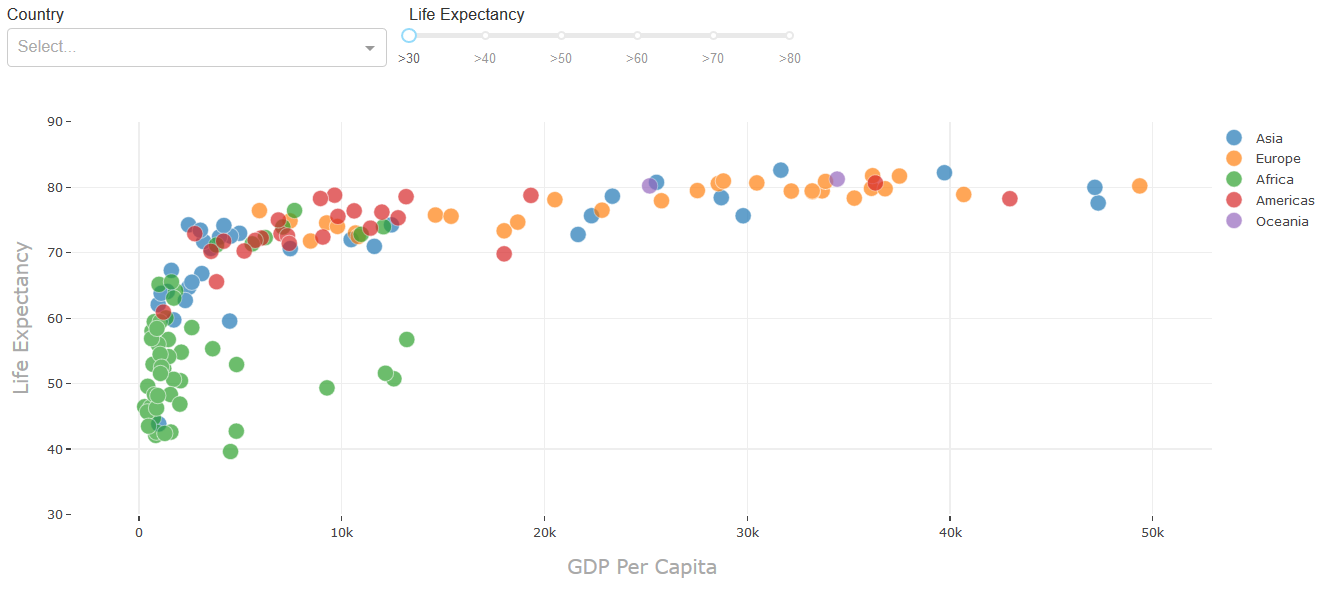